## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
merged_df.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
num_mice = len(merged_df["Mouse ID"].unique())
num_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# 5 rows dropped
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_df["Mouse ID"].unique())
num_mice

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# create drug regimen df
drug_regimen_df = clean_df.groupby("Drug Regimen")

# create table with counts for eac regime
summary_statistics = pd.DataFrame(drug_regimen_df.count())

# run stats on tumor volume
summary_statistics["Mean"] = pd.DataFrame(drug_regimen_df["Tumor Volume (mm3)"].mean())
summary_statistics["Median"] = pd.DataFrame(drug_regimen_df["Tumor Volume (mm3)"].median())
summary_statistics["Variance"] = pd.DataFrame(drug_regimen_df["Tumor Volume (mm3)"].var())
summary_statistics["Std Dev"] = pd.DataFrame(drug_regimen_df["Tumor Volume (mm3)"].std())
summary_statistics["SEM"] = pd.DataFrame(drug_regimen_df["Tumor Volume (mm3)"].sem())

# sort for wanted columns # include Mouse ID for later
summary_statistics = summary_statistics[["Mouse ID", "Mean", "Median", "Variance", "Std Dev", "SEM"]]

# appropriately name mouse column
summary_statistics = summary_statistics.rename(columns = {"Mouse ID" : "Number of Mice"})

summary_statistics

,Number of Mice,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,156,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

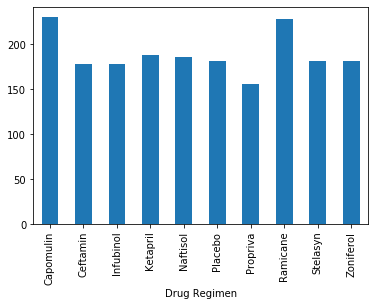

In [7]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_num = summary_statistics["Number of Mice"]
mice_num.plot.bar()

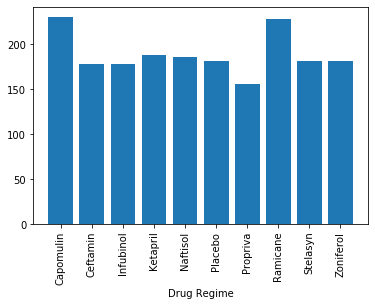

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(summary_statistics))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, summary_statistics["Number of Mice"])

plt.xticks(tick_locations, summary_statistics.index.values, rotation="vertical")

plt.xlabel("Drug Regime")

plt.show()


In [9]:
# create new df for count of each gender
groupby_gender = clean_df.groupby(["Mouse ID","Sex"])

mouse_gender_df = pd.DataFrame(groupby_gender.size())

mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

mouse_gender

,Total Count
Sex,
Female,124
Male,125


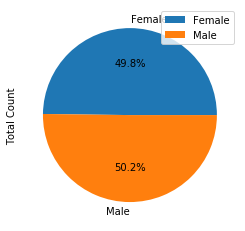

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender.plot.pie(y="Total Count", autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x1d9f5d35088>,
 [Text(0.006911472368401293, 1.0999782868537455, 'Female'),
  Text(-0.006911369381001614, -1.0999782875008395, 'Male')],
 [Text(0.003769894019127977, 0.5999881564656793, '49.8%'),
  Text(-0.003769837844182698, -0.5999881568186396, '50.2%')])

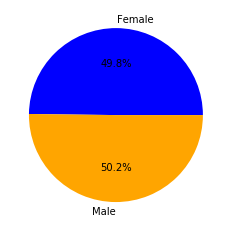

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplotlt.pie(x_axis, summary_statistics["Number of Mice"])
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [49.8, 50.2]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Creates the pie chart based upon the values above
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
ramicane = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane"]
infubinol = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol"]
ceftamin = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
greatest_capomulin = capomulin.groupby("Mouse ID").max()["Timepoint"]
capomulin_df = pd.DataFrame(greatest_capomulin)
greatest_ramicane = ramicane.groupby("Mouse ID").max()["Timepoint"]
ramicane_df = pd.DataFrame(greatest_ramicane)
greatest_infubinol = infubinol.groupby("Mouse ID").max()["Timepoint"]
infubinol_df = pd.DataFrame(greatest_infubinol)
greatest_ceftamin = ceftamin.groupby("Mouse ID").max()["Timepoint"]
ceftamin_df = pd.DataFrame(greatest_ceftamin)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_merged_df = pd.merge(clean_df, capomulin_df, on=("Mouse ID", "Timepoint"), how="right")
ramicane_merged_df = pd.merge(clean_df, ramicane_df, on=("Mouse ID", "Timepoint"), how="right")
infubinol_merged_df = pd.merge(clean_df, infubinol_df, on=("Mouse ID", "Timepoint"), how="right")
ceftamin_merged_df = pd.merge(clean_df, ceftamin_df, on=("Mouse ID", "Timepoint"), how="right")

ceftamin_merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a275,Ceftamin,Female,20,28,45,62.999356,3
1,b447,Ceftamin,Male,2,30,0,45.000000,0
2,b487,Ceftamin,Female,6,28,25,56.057749,1
3,b759,Ceftamin,Female,12,25,30,55.742829,1
4,f436,Ceftamin,Female,3,25,15,48.722078,2
5,h531,Ceftamin,Male,5,27,5,47.784682,0
6,j296,Ceftamin,Female,24,30,45,61.849023,3
7,k210,Ceftamin,Male,15,28,45,68.923185,3
8,l471,Ceftamin,Female,7,28,45,67.748662,1
9,l490,Ceftamin,Male,24,26,30,57.918381,3


In [13]:
capomulin_tumor_vol = capomulin_merged_df["Tumor Volume (mm3)"]
ramicane_tumor_vol = ramicane_merged_df["Tumor Volume (mm3)"]
infubinol_tumor_vol = infubinol_merged_df["Tumor Volume (mm3)"]
ceftamin_tumor_vol = ceftamin_merged_df["Tumor Volume (mm3)"]

#capomulin quartiles, IQR & outliers
capomulin_quartiles = capomulin_tumor_vol.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq

capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
print(f"Values below {capomulin_lower_bound} could be outliers for capomulin.")
print(f"Values above {capomulin_upper_bound} could be outliers for capomulin.")

#ramicane quartiles, IQR & outliers
ramicane_quartiles = ramicane_tumor_vol.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq

ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
print(f"Values below {ramicane_lower_bound} could be outliers for ramicane.")
print(f"Values above {ramicane_upper_bound} could be outliers for ramicane.")

#infubinol quartiles, IQR & outliers
infubinol_quartiles = infubinol_tumor_vol.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
print(f"Values below {infubinol_lower_bound} could be outliers for infubinol.")
print(f"Values above {infubinol_upper_bound} could be outliers for infubinol.")

#infubinol quartiles, IQR & outliers
ceftamin_quartiles = ceftamin_tumor_vol.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq

ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
print(f"Values below {ceftamin_lower_bound} could be outliers for ceftamin.")
print(f"Values above {ceftamin_upper_bound} could be outliers for ceftamin.")

Values below 20.70456164999999 could be outliers for capomulin.
Values above 51.83201549 could be outliers for capomulin.
Values below 17.912664470000003 could be outliers for ramicane.
Values above 54.30681135 could be outliers for ramicane.
Values below 36.83290494999999 could be outliers for infubinol.
Values above 82.74144559000001 could be outliers for infubinol.
Values below 25.355449580000002 could be outliers for ceftamin.
Values above 87.66645829999999 could be outliers for ceftamin.


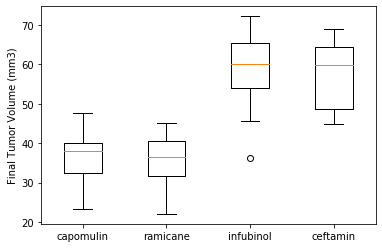

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatment_volumes = [capomulin_tumor_vol, ramicane_tumor_vol, infubinol_tumor_vol, ceftamin_tumor_vol]

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(treatment_volumes)
plt.xticks([1, 2, 3, 4], ["capomulin", "ramicane", "infubinol", "ceftamin"])

plt.show()

## Line and Scatter Plots

    Timepoint  Tumor Volume (mm3)
10          0           45.000000
11          5           43.878496
12         10           37.614948
13         15           38.177232
14         20           36.866876
15         25           33.949940
16         30           32.959671
17         35           28.328531
18         40           25.472143
19         45           23.343598


Text(0, 0.5, 'Tumor Volume (mm3)')

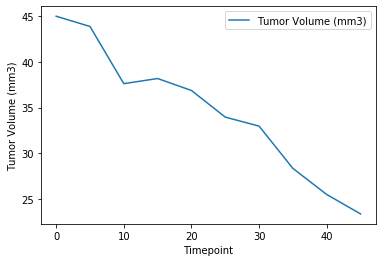

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# time = x, TV = y
s185_mouse = clean_df.loc[clean_df["Mouse ID"] == "s185"]
s185_mouse = s185_mouse[["Timepoint", "Tumor Volume (mm3)"]]
print(s185_mouse)

s185_mouse.set_index("Timepoint").plot.line()
plt.ylabel("Tumor Volume (mm3)")


          Weight (g)  Tumor Volume (mm3)
Mouse ID                                
b128            22.0           41.963636
b742            21.0           40.083699
f966            17.0           36.505973
g288            19.0           41.990097
g316            22.0           44.613344


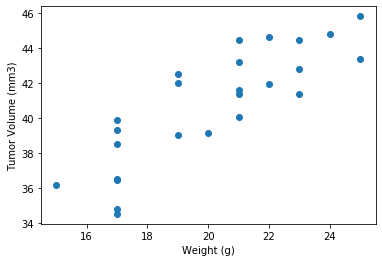

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# weight = x, mean TV = y # must be average tumor volume per mouse
avg_tumor = capomulin.groupby(["Mouse ID"]).mean()
avg_tumor = avg_tumor[["Weight (g)", "Tumor Volume (mm3)"]]
print(avg_tumor.head())

x_axis = avg_tumor["Weight (g)"]
y_axis = avg_tumor["Tumor Volume (mm3)"]

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.scatter(x_axis, y_axis)
plt.show()

## Correlation and Regression

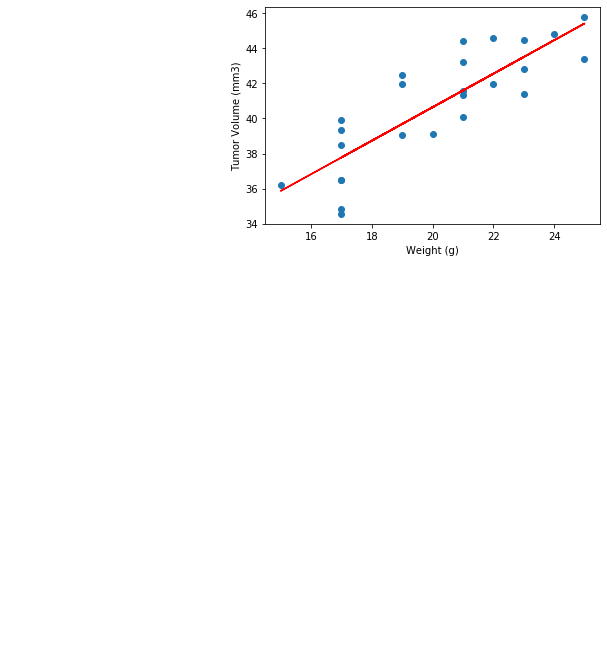

The correlation between both factors is 0.84


In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
x_values = avg_tumor["Weight (g)"]
y_values = avg_tumor["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")